# 9. Logistic Regression

In this lab, you simply need to run the code below in order to understand how to utilize logistic regression classification under various python libraries.  There is only a simple task at the end of the notebook

In [62]:
%matplotlib inline


from sklearn import datasets
import numpy as np

np.random.seed(12345)

# Load the wine dataset (description here http://scikit-learn.org/stable/datasets/index.html#diabetes-dataset)
wine = datasets.load_wine()

# Split the data into training/testing sets
total_samples = wine.target.shape[0]
exclude = round(total_samples/3)
indices = np.arange(0,total_samples)
np.random.shuffle(indices)

idx_train = indices[:-exclude]
idx_test = indices[-exclude:]

assert not np.intersect1d( idx_test, idx_train ).size

X_train = wine.data[idx_train]
X_test = wine.data[idx_test]

# Split the targets into training/testing sets
y_train = wine.target[idx_train]
y_test = wine.target[idx_test]


print(y_test)

#len(np.unique(y_train))


[1 1 2 0 2 0 1 1 2 2 1 1 1 0 0 0 1 1 1 1 2 1 2 2 1 0 2 1 2 0 0 0 2 0 0 0 0
 1 2 0 2 2 0 2 0 0 1 0 2 1 0 1 2 0 1 1 1 1 0 0 1 1 0 0 1 1 0 2 1 0 1 1 2 2
 1 1 0 1 1 1 2 1 1 2 1 2 0 0 1 0 2 0 0 0 2 0 2 2 0 1 0 1 2 2 0 2 0 0 0 1 0
 0 0 1 1 0 1 1 2]
[2 1 1 0 0 1 1 0 0 1 2 2 1 0 1 2 0 2 2 1 2 1 1 1 2 2 1 2 1 0 1 2 1 0 2 0 0
 0 1 2 1 0 1 2 1 1 2 1 1 1 0 2 0 1 1 2 2 1 0]


### 9.1 Logistic Regression with scikit-learn
Go through the code below and then run the cell to perform logistic regression with scikit-learn

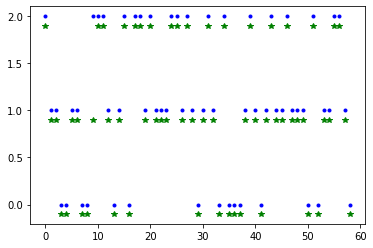

[[15  0  0]
 [ 0 25  1]
 [ 0  0 18]]
accuracy: 0.98
class 0, precision: 1.00, recall: 1.00,  f-score: 1.00
class 1, precision: 1.00, recall: 0.96,  f-score: 0.98
class 2, precision: 0.95, recall: 1.00,  f-score: 0.97


In [27]:
import matplotlib.pyplot as plt
from sklearn import metrics, linear_model


# create a logisitic regression model
logreg = linear_model.LogisticRegression(solver='liblinear',multi_class='auto')

# Train using training set
logreg.fit(X_train, y_train)

# Predict using test set
y_pred = logreg.predict(X_test)

# Plot outputs
plt.plot(y_test-0.1,'g*')
plt.plot(y_pred,'b.')
plt.show()

# evaluation
print(metrics.confusion_matrix(y_test, y_pred))
print("accuracy: %.2f" % metrics.accuracy_score(y_test, y_pred))

# calculate precision and recall (and f-score, a weighted average of precision and recall) 
precision,recall,fscore,_ = metrics.precision_recall_fscore_support(y_test,y_pred )
for c in np.unique(y_test):
        print("class %s, precision: %.2f, recall: %.2f,  f-score: %.2f" % (c, precision[c], recall[c], fscore[c]))



### 9.2 Logisitic regression on other datasets

See if you can adapt the above code to work on another dataset, e.g. the breast cancer dataset (http://scikit-learn.org/stable/datasets/ includes a number of options). 

In [79]:
from sklearn import datasets
import numpy as np
# Load the breast cancer dataset and print description
cancer = datasets.load_breast_cancer()
print(cancer.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry 
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 3 is Mean Radius, f

In [111]:
# Get number of samples
num_instances = cancer.target.shape[0]
# get a cutoff point about a 1/3 through the set
cutoff = round(num_instances/3)
# Get indices for the set
indices = np.arange(0, num_instances)
# Set seed and shuffle
np.random.seed(123)
np.random.shuffle(indices)
# Split indices into training and testing
id_train = indices[:-cutoff]
id_test = indices[-cutoff:]
# Assert there is no intersection in indices
assert not np.intersect1d( id_test, id_train ).size

# Get training inputs and outputs
X_train = cancer.data[id_train]
y_train = cancer.target[id_train]
# Get testing inputs and outputs
X_test = cancer.data[id_test]
y_test = cancer.target[id_test]

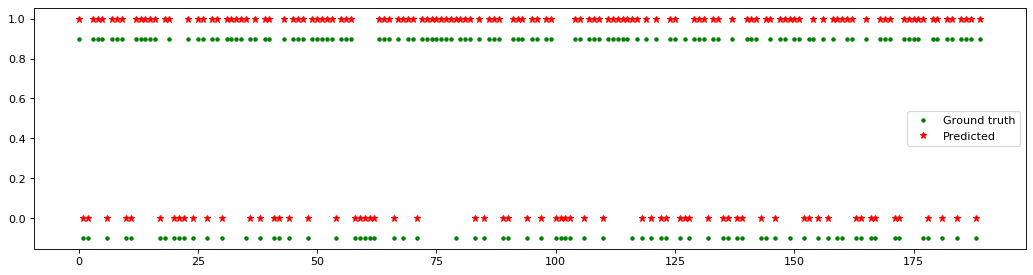

Confusion matrix:

 [[ 63  10]
 [  3 114]]

Accuracy: 0.93

class 0: precision: 0.95, recall: 0.86,  f-score: 0.91

class 1: precision: 0.92, recall: 0.97,  f-score: 0.95


In [122]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from sklearn import metrics, linear_model
# load model
logit = linear_model.LogisticRegression(solver="liblinear", multi_class="auto")
# Train the model
logit.fit(X_train, y_train)
# Predict values for test
y_pred = logit.predict(X_test)

# Plot outputs
# Set figure size
figure(num=None, figsize=(16, 4), dpi=80, facecolor='w', edgecolor='k')
# Plot ground truth in green
plt.plot(y_test-0.1,'g.')
# Plot predicted in red
plt.plot(y_pred,'r*')
plt.legend(["Ground truth", "Predicted"])
plt.show()

# Performance evaluation
print("Confusion matrix:\n\n",metrics.confusion_matrix(y_test, y_pred))
print("\nAccuracy: %.2f" % metrics.accuracy_score(y_test, y_pred))
# calculate precision and recall (and f-score, a weighted average of precision and recall) 
precision,recall,fscore,_ = metrics.precision_recall_fscore_support(y_test,y_pred )
for c in np.unique(y_test):
        print("\nclass %s: precision: %.2f, recall: %.2f,  f-score: %.2f" % (c, precision[c], recall[c], fscore[c]))